In [2]:
# Data
import numpy as np
import pandas as pd
import random

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# # styling
%matplotlib inline
# sns.set_style('darkgrid')
# mpl.rcParams['font.size'] = 14
# mpl.rcParams['figure.facecolor'] = '#00000000'
# mpl.rcParams['font.size'] = 14
# mpl.rcParams['figure.facecolor'] = '#00000000'

import os

import warnings
warnings.filterwarnings("ignore")

# Applying Under sampling

In [9]:
df_cr = pd.read_csv("credit_risk_dataset_1.csv")
df_cr.head()

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
0                   OWN   EDUCATION          B                         N   
1              MORTGAGE     MEDICAL          C                         N   
2                  RENT     MEDICAL          C                         N   
3                  RENT     MEDICAL          C                         Y   
4                   OWN     VENTURE          A                         N   

   person_income  person_age  person_emp_length  loan_amnt  loan_int_rate  \
0           9600          21                5.0       1000          11.14   
1           9600          25                1.0       5500          12.87   
2          65500          23                4.0      35000          15.23   
3          54400          24                8.0      35000          14.27   
4           9900          21                2.0       2500           7.14   

   cb_person_cred_hist_length  loan_percent_income  loan_status  
0                           0                 0.10            0  
1                           0                 0.57            1  
2                           0                 0.53            1  
3                           4                 0.55            1  
4                           0                 0.25            1

In [10]:
df_cr.duplicated().sum()

0

In [11]:
df_cr.drop_duplicates(inplace = True)

In [12]:
df_cr.isnull().sum()

person_home_ownership            0
loan_intent                      0
loan_grade                       0
cb_person_default_on_file        0
person_income                    0
person_age                       0
person_emp_length              876
loan_amnt                        0
loan_int_rate                 3062
cb_person_cred_hist_length       0
loan_percent_income              0
loan_status                      0
dtype: int64

In [13]:
df_cr.dropna(inplace = True)

In [14]:
df_cr["loan_status"].value_counts()

0    22026
1     6128
Name: loan_status, dtype: int64

In [15]:
df_cr_0 = df_cr[df_cr["loan_status"] == 0].sample(12012)

In [16]:
df_cr_1 = df_cr[df_cr["loan_status"] == 1]

In [17]:
df_cr_new = pd.concat([df_cr_0, df_cr_1], axis = 0)

In [18]:
# Shuffle the index of the DataFrame
shuffled_index = df_cr_new.index.to_list()
random.shuffle(shuffled_index)

# Reindex the DataFrame with the shuffled index
df_cr_new = df_cr_new.reindex(shuffled_index)

In [19]:
df_cr_new["loan_status"].value_counts(1)

0    0.662183
1    0.337817
Name: loan_status, dtype: float64

In [20]:
X = df_cr_new.drop(columns= ['loan_status'])
y = df_cr_new['loan_status']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12, stratify = y )
print(f"Shape of X train {X_train.shape}, X test {X_test.shape}")
print(f"Shape of Y train {y_train.shape}, Y test {y_test.shape}")

Shape of X train (13605, 11), X test (4535, 11)
Shape of Y train (13605,), Y test (4535,)


In [22]:
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']
ohe_colums = ['loan_grade', 'person_home_ownership','loan_intent']

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit and transform using a DataFrame
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_train.index)
temp_X_test = pd.DataFrame(ohe.transform(X_test[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_test.index)

# Concatenate the one-hot encoded features back to the original DataFrames
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_test = pd.concat([X_test, temp_X_test], axis=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import pandas as pd

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']


std = StandardScaler()

X_train_scaled = pd.DataFrame(std.fit_transform(X_train[scale_cols]),columns=scale_cols, index = X_train.index)
X_test_scaled = pd.DataFrame(std.fit_transform(X_test[scale_cols]),columns=scale_cols, index = X_test.index)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=1000, random_state=12)

lrg.fit(X_train_scaled, y_train)
y_pred_lrg = lrg.predict(X_test_scaled)

print(f"Accuracy on train data {lrg.score(X_train_scaled, y_train)}")
print(f"Accuracy on test data {lrg.score(X_test_scaled, y_test)}")

print(classification_report(y_test, y_pred_lrg))

Accuracy on train data 0.765380374862183
Accuracy on test data 0.7788313120176406
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3003
           1       0.70      0.59      0.64      1532

    accuracy                           0.78      4535
   macro avg       0.76      0.73      0.74      4535
weighted avg       0.77      0.78      0.77      4535



In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced', criterion='gini',  max_depth=20, max_features= 'sqrt', random_state=14)
dtc.fit(X_train_scaled, y_train)

y_pred_dtc = dtc.predict(X_test_scaled)
print(f" Accuracy on train data: {dtc.score(X_train_scaled, y_train)}")
print(f" Accuracy on test data: {dtc.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_dtc))

 Accuracy on train data: 0.980374862183021
 Accuracy on test data: 0.7488423373759647
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3003
           1       0.62      0.65      0.64      1532

    accuracy                           0.75      4535
   macro avg       0.72      0.72      0.72      4535
weighted avg       0.75      0.75      0.75      4535



In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc_main = RandomForestClassifier(random_state=1008)
rfc_main.fit(X_train_scaled, y_train)
y_pred_rfc_main = rfc_main.predict(X_test_scaled)
print(f" Accuracy on train data: {rfc_main.score(X_train_scaled, y_train)}")
print(f" Accuracy on test data: {rfc_main.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_rfc_main))

 Accuracy on train data: 0.9998529952223447
 Accuracy on test data: 0.8167585446527013
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3003
           1       0.75      0.69      0.72      1532

    accuracy                           0.82      4535
   macro avg       0.80      0.79      0.79      4535
weighted avg       0.81      0.82      0.81      4535



In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb.score(X_train_scaled, y_train)}")
print(f'Accuracy on test_data = {xgb.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))

 Accuracy on train data: 0.9100330760749724
Accuracy on test_data = 0.809922822491731
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3003
           1       0.73      0.70      0.71      1532

    accuracy                           0.81      4535
   macro avg       0.79      0.78      0.79      4535
weighted avg       0.81      0.81      0.81      4535



Above models are best of there models taken from previous file. it seems like that undersampling do nnot working good on every model is not a good approach. Oversampling preform better than this so taking over sampling for futher work

# Starting New work

## Reading Data

In [41]:
df_cr = pd.read_csv("credit_risk_dataset_1.csv")
df_cr.head()

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
0                   OWN   EDUCATION          B                         N   
1              MORTGAGE     MEDICAL          C                         N   
2                  RENT     MEDICAL          C                         N   
3                  RENT     MEDICAL          C                         Y   
4                   OWN     VENTURE          A                         N   

   person_income  person_age  person_emp_length  loan_amnt  loan_int_rate  \
0           9600          21                5.0       1000          11.14   
1           9600          25                1.0       5500          12.87   
2          65500          23                4.0      35000          15.23   
3          54400          24                8.0      35000          14.27   
4           9900          21                2.0       2500           7.14   

   cb_person_cred_hist_length  loan_percent_income  loan_status  
0                           0                 0.10            0  
1                           0                 0.57            1  
2                           0                 0.53            1  
3                           4                 0.55            1  
4                           0                 0.25            1

In [42]:
df_cr.isnull().sum()

person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
person_income                 0
person_age                    0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_cred_hist_length    0
loan_percent_income           0
loan_status                   0
dtype: int64

In [43]:
df_cr.duplicated().sum()

0

In [44]:
df_cr["loan_status"].value_counts()

0    25003
1     7019
Name: loan_status, dtype: int64

## Preprocessing and Splitting

In [45]:
X = df_cr.drop(columns= ['loan_status'])
y = df_cr['loan_status']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12, stratify = y )
print(f"Shape of X train {X_train.shape}, X test {X_test.shape}")
print(f"Shape of Y train {y_train.shape}, Y test {y_test.shape}")

Shape of X train (24016, 11), X test (8006, 11)
Shape of Y train (24016,), Y test (8006,)


In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe_colums = ['loan_grade', 'person_home_ownership','loan_intent']

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit and transform using a DataFrame
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_train.index)
temp_X_test = pd.DataFrame(ohe.transform(X_test[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_test.index)

# Concatenate the one-hot encoded features back to the original DataFrames
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_test = pd.concat([X_test, temp_X_test], axis=1)

In [48]:
from sklearn.preprocessing import OrdinalEncoder

ore = OrdinalEncoder()

X_train["cb_person_default_on_file"] = ore.fit_transform(X_train[["cb_person_default_on_file"]])
X_test["cb_person_default_on_file"] = ore.transform(X_test[["cb_person_default_on_file"]])

In [49]:
X_train.drop(columns= ['loan_grade', 'person_home_ownership','loan_intent'], inplace=True)
X_test.drop(columns= ['loan_grade', 'person_home_ownership','loan_intent'], inplace=True)

In [50]:
X_test

cb_person_default_on_file  person_income  person_age  \
30713                        0.0          80000          37   
9135                         0.0          66000          25   
11131                        1.0          72000          25   
729                          0.0          21600          26   
21862                        0.0          53000          34   
...                          ...            ...         ...   
15565                        0.0          19800          21   
21414                        0.0          50004          34   
23443                        0.0          40000          29   
31661                        0.0          45840          41   
18004                        1.0          54000          35   

       person_emp_length  loan_amnt  loan_int_rate  \
30713               18.0      20000      11.830000   
9135                 1.0       5050      11.490000   
11131                3.0      16000      17.140000   
729                  5.0       5200      12.420000   
21862                7.0       3100       7.900000   
...                  ...        ...            ...   
15565                4.0       6800      14.590000   
21414                6.0       6000       7.880000   
23443                7.0       9500      11.034793   
31661                5.0       4600      10.990000   
18004                0.0      20500      14.610000   

       cb_person_cred_hist_length  loan_percent_income  loan_grade_A  \
30713                           0                 0.25           0.0   
9135                            0                 0.08           0.0   
11131                           3                 0.22           0.0   
729                             0                 0.24           0.0   
21862                           0                 0.06           1.0   
...                           ...                  ...           ...   
15565                           0                 0.34           0.0   
21414                           0                 0.12           1.0   
23443                           0                 0.24           1.0   
31661                           0                 0.10           0.0   
18004                           5                 0.38           0.0   

       loan_grade_B  ...  person_home_ownership_MORTGAGE  \
30713           1.0  ...                             1.0   
9135            1.0  ...                             0.0   
11131           0.0  ...                             0.0   
729             1.0  ...                             0.0   
21862           0.0  ...                             1.0   
...             ...  ...                             ...   
15565           0.0  ...                             0.0   
21414           0.0  ...                             0.0   
23443           0.0  ...                             0.0   
31661           1.0  ...                             0.0   
18004           0.0  ...                             0.0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
30713                          0.0                        0.0   
9135                           0.0                        0.0   
11131                          0.0                        1.0   
729                            0.0                        1.0   
21862                          0.0                        0.0   
...                            ...                        ...   
15565                          0.0                        1.0   
21414                          0.0                        0.0   
23443                          0.0                        0.0   
31661                          0.0                        0.0   
18004                          0.0                        0.0   

       person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
30713                         0.0                            0.0   
9135                          1.0                            0.0   
11131                         

In [55]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={1: 9700}, random_state=3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [56]:
y_train_resampled.value_counts(1)

0    0.659075
1    0.340925
Name: loan_status, dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled= pd.DataFrame(std.fit_transform(X_train_resampled), columns=X_train_resampled.columns, index= X_train_resampled.index)
X_test_scaled= pd.DataFrame(std.transform(X_test), columns=X_test.columns, index= X_test.index)

In [58]:
# Importing classification report and confussion matrix

from sklearn.metrics import classification_report, confusion_matrix

In [59]:
def confusion(y_test, y_pred):
    sns.set_theme(style= "whitegrid")
    plt.rcParams["figure.figsize"] = [5,3]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = "Actual"
    df_cm.columns.name = "Predicted"
    cm = sns.heatmap(df_cm,annot=True, fmt="g")
    cm.plot()

 Accuracy on train data: 0.9999297061717981
 Accuracy on test data: 0.9344241818636023
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.97      0.72      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.95      0.86      0.89      8006
weighted avg       0.94      0.93      0.93      8006



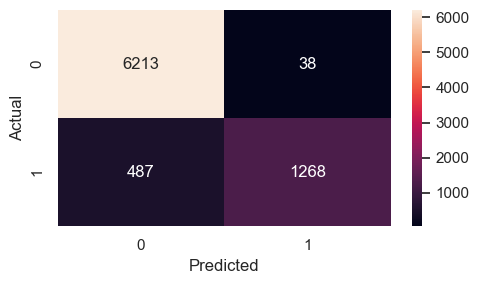

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc_main = RandomForestClassifier(random_state=18)
rfc_main.fit(X_train_scaled, y_train_resampled)
y_pred_rfc_main = rfc_main.predict(X_test_scaled)
print(f" Accuracy on train data: {rfc_main.score(X_train_scaled, y_train_resampled)}")
print(f" Accuracy on test data: {rfc_main.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_rfc_main))
confusion(y_test, y_pred_rfc_main)

## Working on XG Boost (because it gives good results in previous file)

 Accuracy on train data: 0.9490206918338335
Accuracy on test_data = 0.9375526241930957
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5579
           1       0.97      0.74      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.95      0.86      0.90      7126
weighted avg       0.94      0.94      0.93      7126



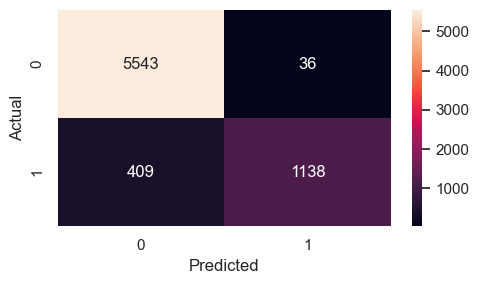

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20, n_estimators=400, max_depth=5, learning_rate = 0.05)
xgb.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

 Accuracy on train data: 0.9998025588374664
Accuracy on test_data = 0.9374122930115072
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5579
           1       0.94      0.76      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.94      0.87      0.90      7126
weighted avg       0.94      0.94      0.93      7126



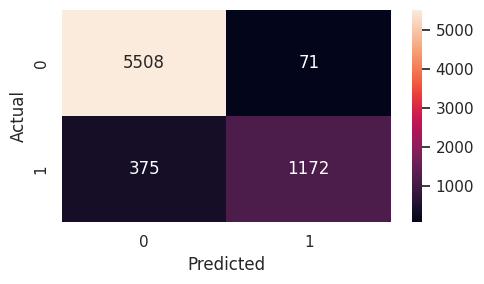

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
        "max_depth": [3, 18, 1],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : [0, 10, 1],
        'n_estimators': [180, 100, 200],
        'seed': [0]
}

# Create XGBoost model
xgb_model = xgb.XGBClassifier(tree_method='hist')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, n_jobs=-1, verbose=2)

In [49]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
    'n_estimators': [100, 200, 500],
    "max_depth": [3, 18, 1],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'colsample_bytree' : [0.5,1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

# Create XGBoost model
xgb_model = xgb.XGBClassifier(tree_method='hist')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, n_jobs=-1, verbose=2)

In [50]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found:", grid_search.best_params_)

Fitting 3 folds for each of 8748 candidates, totalling 26244 fits
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.1s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_ra

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=  

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)



[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s



/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.1s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=2

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=10

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estima

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=10

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=2

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_esti

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimator

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_a

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=50

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=2

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_a

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=2

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.2s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_a

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:19:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s



/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.1s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; tota

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total ti

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s



/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.1s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; tota

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.2, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END base_score=0.5, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:26:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=10

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimat

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=5

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimato

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimator

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=10

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_a

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.9s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:28:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total tim

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)



[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lamb

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.3s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alph

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alp

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_al

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:29:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, re

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_la

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.9s



/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5,

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.8s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s



/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.5s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, r

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.8s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   1.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_l

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   3.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   3.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   3.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   3.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   1.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lam

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   3.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   3.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   3.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   4.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   4.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   4.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   4.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   3.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   3.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   3.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)



[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=1, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; to

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=1;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   1.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   3.1s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.2s

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   3.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   0.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambd

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.5s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.6s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.7s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.6s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.7s

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; total time=   1.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=1; t

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   1.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.5s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=0.5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5;

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=0.5; total time=   2.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=100, reg_alpha=1, reg_lambda=5; total time=   0.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   2.9s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=18, n_estimators=500, reg_alpha=1, reg_lambda=5; total time=   3.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   1.0s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.0s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; 

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0, reg_lambda=5; total time=   1.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1; total time=   1.2s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; tot

/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   0.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=0.5; total time=   1.2s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=200, reg_alpha=1, reg_lambda=5; total time=   1.1s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   1.9s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.3s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gam

[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.4s[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   2.3s



/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5; total time=   2.8s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.4s


/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/akshat/anaconda3/envs/myenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:31:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=0.5; total time=   3.4s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0, reg_lambda=5; total time=   3.3s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=1; total time=   2.7s
[CV] END base_score=0.5, booster=gblinear, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5; total time=   2.7s
[CV] END base_score=1, booster=gbtree, colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.5; to

In [48]:
grid_search.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.1,
 'n_estimators': 500,
 'reg_alpha': 1,
 'reg_lambda': 5}

 Accuracy on train data: 0.9998815353024798
Accuracy on test_data = 0.9368509682851529
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5579
           1       0.95      0.75      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.94      0.87      0.90      7126
weighted avg       0.94      0.94      0.93      7126



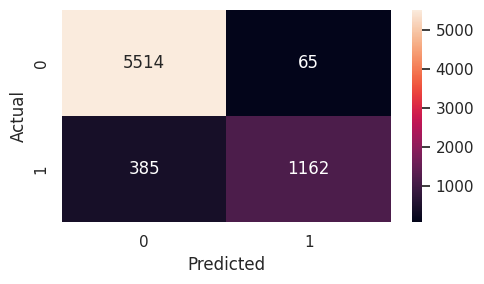

In [51]:
from xgboost import XGBClassifier

xgb_hyp = XGBClassifier(base_score = 0.2, booster = "gbtree", random_state = 15,colsample_bytree =  0.5, n_estimators=500, gamma = 0, min_child_weight = 1, reg_alpha = 1, reg_lambda = 5, max_depth=18, learning_rate = 0.1)
xgb_hyp.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb_hyp.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb_hyp.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb_hyp.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

 Accuracy on train data: 0.959682514610646
Accuracy on test_data = 0.9403592478248667
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5579
           1       0.98      0.74      0.84      1547

    accuracy                           0.94      7126
   macro avg       0.96      0.87      0.90      7126
weighted avg       0.94      0.94      0.94      7126



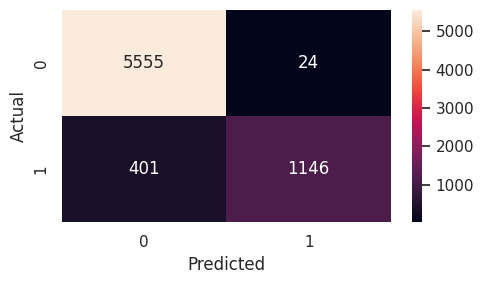

In [43]:
from xgboost import XGBClassifier

xgb_hyp = XGBClassifier(random_state = 15,colsample_bytree =  0.5, n_estimators=500, gamma = 1, min_child_weight = 1, reg_alpha = 1, reg_lambda = 1, max_depth=18, learning_rate = 0.1)
xgb_hyp.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb_hyp.predict(X_test_scaled)

print(f" Accuracy on train data: {xgb_hyp.score(X_train_scaled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb_hyp.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

- All variations of the XGBoost model show promising results.
- Some models exhibit signs of overfitting on the training data, while others demonstrate good accuracy, precision, and recall.
- However, the last model stands out with superior performance, boasting excellent accuracy, precision, recall, and a more favorable confusion matrix compared to the others.
- XGBoost with hyperparameter tuning achieved impressive results with high accuracy on both train (99.99%) and test data (93.69%). It demonstrated strong precision, recall, and 1-score for both classes, indicating robust performance in classification.
- Therefore, this final XGBoost model will be selected as the preferred model for creating the pipeline and making predictions.

## Pipeline

In [138]:
from sklearn.compose import ColumnTransformer
import pickle
import joblib
from sklearn.preprocessing import OneHotEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [139]:
ct_encoding = ColumnTransformer(transformers= [
    ("ohe_enc", OneHotEncoder(sparse_output=False, handle_unknown= "ignore"), [0,1,2]),
    ("ord_enc", OrdinalEncoder(), [3]),
],remainder= "passthrough")

In [140]:
# Defining model

model = XGBClassifier(random_state = 15,colsample_bytree =  0.5, n_estimators=500, gamma = 1, min_child_weight = 1, reg_alpha = 1, reg_lambda = 1, max_depth=18, learning_rate = 0.1)

In [141]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ("encoding", ct_encoding),
    ("scaler", StandardScaler()),
    ("model", model)
])

In [143]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2]),
                                                 ('ord_enc', OrdinalEncoder(),
                                                  [3])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_b...
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=18, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=15, ...))])

In [144]:
y_pred_log = pipe.predict(X_test)

In [145]:
pd.Series(y_pred_log).value_counts()

0    5961
1    1165
Name: count, dtype: int64

In [146]:
X_test.loc[3197]

person_home_ownership            RENT
loan_intent                   VENTURE
loan_grade                          D
cb_person_default_on_file           Y
person_income                   13200
person_age                         24
person_emp_length                 6.0
loan_amnt                        4000
loan_int_rate                   15.65
cb_person_cred_hist_length          3
loan_percent_income               0.3
Name: 3197, dtype: object

In [147]:
y_test.loc[3197]

1

In [148]:
df_cr.sample(5)

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
16742                  RENT     VENTURE          A                         N   
17320              MORTGAGE     VENTURE          A                         N   
26485                  RENT     MEDICAL          A                         N   
9231                    OWN    PERSONAL          B                         N   
11175                  RENT    PERSONAL          D                         Y   

       person_income  person_age  person_emp_length  loan_amnt  loan_int_rate  \
16742          60000          27                3.0       2400           7.49   
17320          36000          30                2.0       3000           6.39   
26485          24000          37                4.0       7000           6.92   
9231           68000          26                8.0      24250          12.18   
11175          68496          22                4.0      12000          15.31   

       cb_person_cred_hist_length  loan_percent_income  loan_status  
16742                           6                 0.04            0  
17320                          10                 0.08            0  
26485                          14                 0.29            0  
9231                            4                 0.36            0  
11175                           3                 0.18            0

In [149]:
temp_df = pd.DataFrame(data = [["RENT",	"VENTURE",	"D", "Y", 13200, 24, 6.0, 4000, 15.65, 3, 0.3]], columns = X_test.columns)

In [150]:
pipe.predict(temp_df)

array([1])

In [151]:
# Count unique values
unique_values, counts = np.unique(y_pred_log, return_counts=True)

# Display unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 5961
1: 1165


In [152]:
joblib.dump(pipe, "best_pipeline.joblib")

['best_pipeline.joblib']

In [153]:
rfc_model = joblib.load("best_pipeline.joblib")

In [154]:
rfc_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
rfc_model.predict(temp_df)

array([1])